In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('Data/training_data.csv')
data = data[data['clarity_id'] != '01FF543T2JTRB6CHHBWXNNHMCB'] # Intensity outlier removals
data = data[~(((data['clarity_id'] == '01FF543RRCCWNHSF9RQKZQV785') & (data['metric_year'] == 2006)))] # Raw outlier removal
data.head()

,clarity_id,metric,metric_year,provider_code,clarity_industry_code,clarity_industry_name,country_code,co2directscope1_raw,revenue,co2directscope1_intensity,verification_co2directscope1,targets_emissions,policy_emissions,sbti_alignment,nz_statement
0,01FF543RN5MZWC981FMFGMM6E4,CO2DIRECTSCOPE1,2017,TRC8,25301040/0,Restaurants,GB,9.412684e+05,7.648087e+04,12.307239,NaN,100.0,100.0,100.0,100.0
1,01FF543SRJYTXND0M7XQC1TP4J,CO2DIRECTSCOPE1,2005,TRC8,25102010/0,Automobile Manufacturers,KR,4.651728e+07,1.924310e+06,24.173485,NaN,100.0,100.0,NaN,100.0
2,01FF543VB1A9CJMHM3ECG1RB6Z,CO2DIRECTSCOPE1,2014,TRC1,15104040/0,Precious Metals & Minerals,BM,5.525173e+06,5.898997e+04,93.662921,NaN,100.0,100.0,NaN,1.0
3,01FF543T095C9344VSA8AX6M7X,CO2DIRECTSCOPE1,2017,TRC8,35101020/0,Health Care Supplies,JP,2.686057e+06,5.538943e+05,4.849404,NaN,100.0,100.0,NaN,1.0
4,01FF543WBGY98G1H88BVQG93P0,CO2DIRECTSCOPE1,2008,TRC1,15101050/0,Specialty Chemicals,US,3.916745e+08,8.528900e+05,459.232117,NaN,100.0,100.0,NaN,1.0


C:\Users\Marshall\AppData\Local\Temp\ipykernel_18360\1853876926.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filtered_data['targets_emissions'].fillna('null', inplace=True) # Convert null values to string 'null'
C:\Users\Marshall\AppData\Local\Temp\ipykernel_18360\1853876926.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'null' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  filtered_data['ta

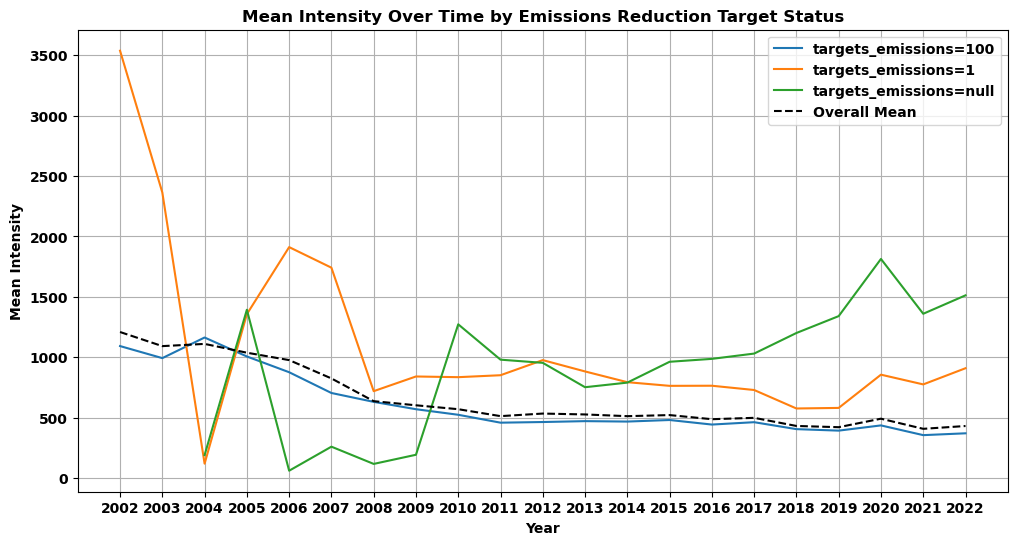

In [2]:
### Intensity by Emissions Reduction Target Status

# Filter to only necessary columns for plot
filtered_data = data[['metric_year', 'co2directscope1_intensity', 'targets_emissions']]
filtered_data['targets_emissions'].fillna('null', inplace=True) # Convert null values to string 'null'

# Group by metric_year and verification status (1/100/null), then calculate the mean co2directscope1_intensity
grouped_data = filtered_data.groupby(['metric_year', 'targets_emissions'])['co2directscope1_intensity'].mean().unstack()
overall_mean = filtered_data.groupby('metric_year')['co2directscope1_intensity'].mean()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(grouped_data.index, grouped_data[100], label='targets_emissions=100')
plt.plot(grouped_data.index, grouped_data[1], label='targets_emissions=1')
plt.plot(grouped_data.index, grouped_data['null'], label='targets_emissions=null')
plt.plot(overall_mean.index, overall_mean, label='Overall Mean', linestyle='--', color='black')

plt.xlabel('Year')
plt.ylabel('Mean Intensity')
plt.title('Mean Intensity Over Time by Emissions Reduction Target Status')
plt.xticks(grouped_data.index)
plt.legend()
plt.grid(True)
plt.show()


C:\Users\Marshall\AppData\Local\Temp\ipykernel_18360\2568445787.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filtered_data['targets_emissions'].fillna('null', inplace=True) # Convert null values to string 'null'
C:\Users\Marshall\AppData\Local\Temp\ipykernel_18360\2568445787.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'null' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  filtered_data['ta

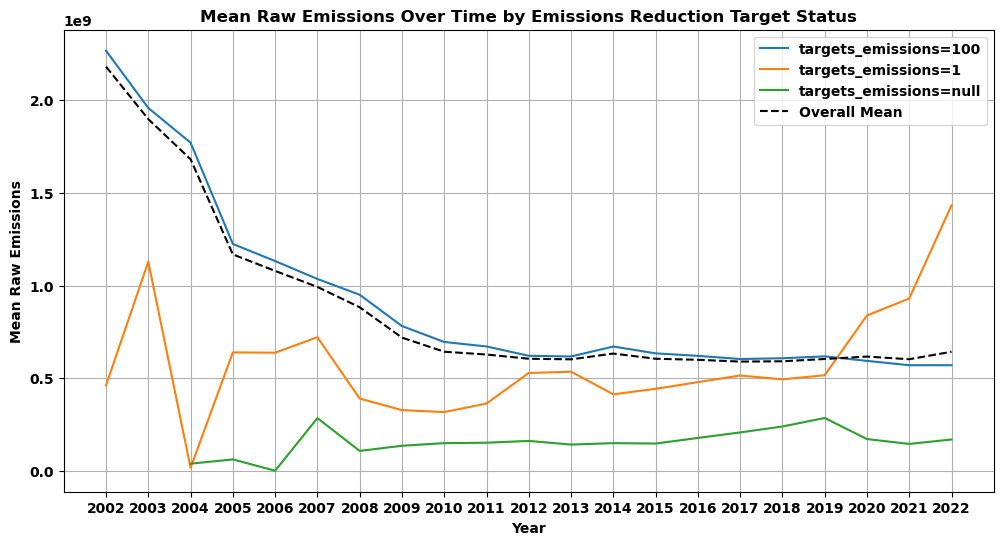

In [3]:
### Raw Emissions by Emissions Reduction Target Status

# Filter to only necessary columns for plot
filtered_data = data[['metric_year', 'co2directscope1_raw', 'targets_emissions']]
filtered_data['targets_emissions'].fillna('null', inplace=True) # Convert null values to string 'null'

# Group by metric_year and verification status (1/100/null), then calculate the mean co2directscope1_intensity
grouped_data = filtered_data.groupby(['metric_year', 'targets_emissions'])['co2directscope1_raw'].mean().unstack()
overall_mean = filtered_data.groupby('metric_year')['co2directscope1_raw'].mean()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(grouped_data.index, grouped_data[100], label='targets_emissions=100')
plt.plot(grouped_data.index, grouped_data[1], label='targets_emissions=1')
plt.plot(grouped_data.index, grouped_data['null'], label='targets_emissions=null')
plt.plot(overall_mean.index, overall_mean, label='Overall Mean', linestyle='--', color='black')

plt.xlabel('Year')
plt.ylabel('Mean Raw Emissions')
plt.title('Mean Raw Emissions Over Time by Emissions Reduction Target Status')
plt.xticks(grouped_data.index)
plt.legend()
plt.grid(True)
plt.show()


C:\Users\Marshall\AppData\Local\Temp\ipykernel_18360\2897910804.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filtered_data['targets_emissions'].fillna('null', inplace=True) # Convert null values to string 'null'
C:\Users\Marshall\AppData\Local\Temp\ipykernel_18360\2897910804.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'null' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  filtered_data['ta

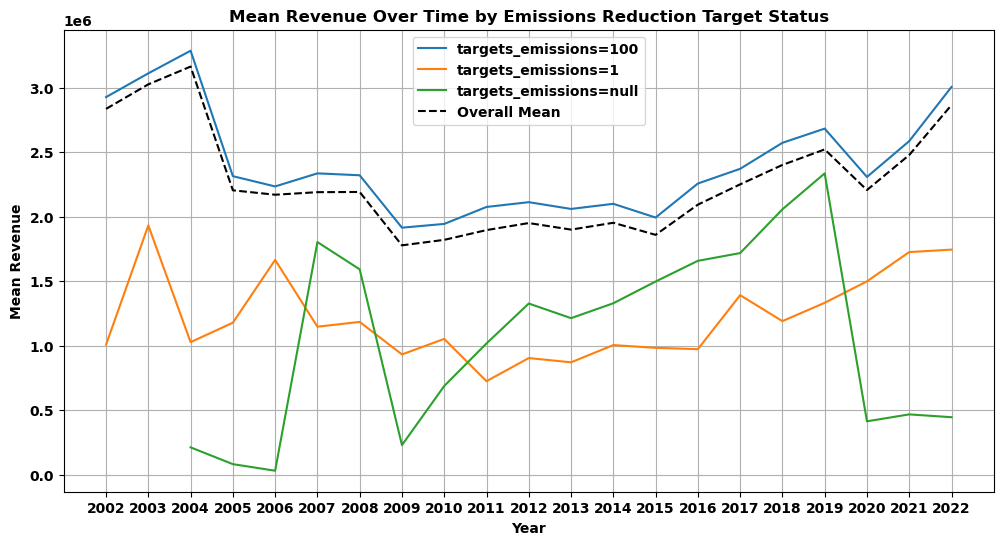

In [4]:
### Revenue by Emissions Reduction Target Status

# Filter to only necessary columns for plot
filtered_data = data[['metric_year', 'revenue', 'targets_emissions']]
filtered_data['targets_emissions'].fillna('null', inplace=True) # Convert null values to string 'null'

# Group by metric_year and verification status (1/100/null), then calculate the mean co2directscope1_intensity
grouped_data = filtered_data.groupby(['metric_year', 'targets_emissions'])['revenue'].mean().unstack()
overall_mean = filtered_data.groupby('metric_year')['revenue'].mean()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(grouped_data.index, grouped_data[100], label='targets_emissions=100')
plt.plot(grouped_data.index, grouped_data[1], label='targets_emissions=1')
plt.plot(grouped_data.index, grouped_data['null'], label='targets_emissions=null')
plt.plot(overall_mean.index, overall_mean, label='Overall Mean', linestyle='--', color='black')

plt.xlabel('Year')
plt.ylabel('Mean Revenue')
plt.title('Mean Revenue Over Time by Emissions Reduction Target Status')
plt.xticks(grouped_data.index)
plt.legend()
plt.grid(True)
plt.show()


C:\Users\Marshall\AppData\Local\Temp\ipykernel_18360\3565761492.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filtered_data['policy_emissions'].fillna('null', inplace=True) # Convert null values to string 'null'
C:\Users\Marshall\AppData\Local\Temp\ipykernel_18360\3565761492.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'null' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  filtered_data['pol

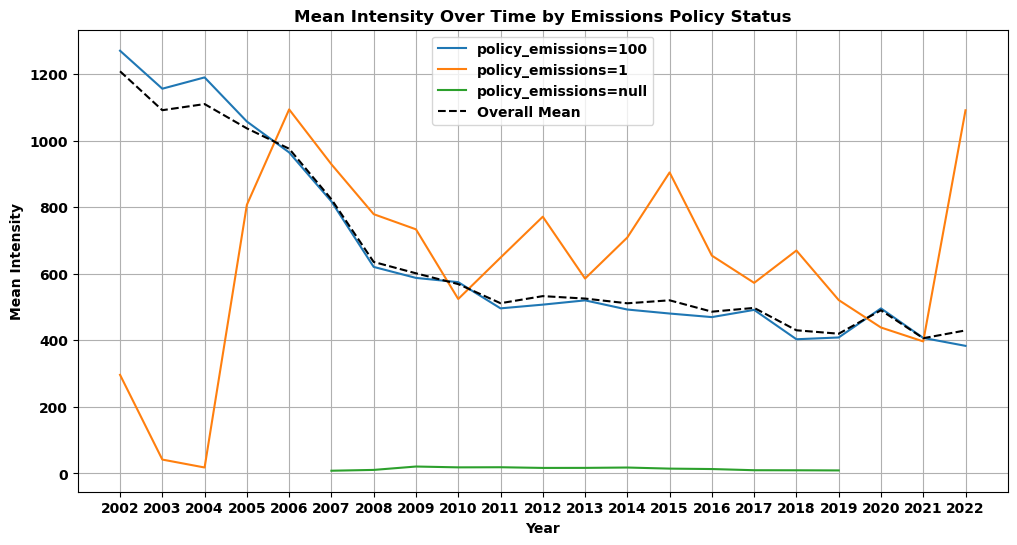

In [5]:
### Intensity by Emissions Policy Status

# Filter to only necessary columns for plot
filtered_data = data[['metric_year', 'co2directscope1_intensity', 'policy_emissions']]
filtered_data['policy_emissions'].fillna('null', inplace=True) # Convert null values to string 'null'

# Group by metric_year and emission policy status (1/100/null), then calculate the mean co2directscope1_intensity
grouped_data = filtered_data.groupby(['metric_year', 'policy_emissions'])['co2directscope1_intensity'].mean().unstack()
overall_mean = filtered_data.groupby('metric_year')['co2directscope1_intensity'].mean()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(grouped_data.index, grouped_data[100], label='policy_emissions=100')
plt.plot(grouped_data.index, grouped_data[1], label='policy_emissions=1')
plt.plot(grouped_data.index, grouped_data['null'], label='policy_emissions=null')
plt.plot(overall_mean.index, overall_mean, label='Overall Mean', linestyle='--', color='black')

plt.xlabel('Year')
plt.ylabel('Mean Intensity')
plt.title('Mean Intensity Over Time by Emissions Policy Status')
plt.xticks(grouped_data.index)
plt.legend()
plt.grid(True)
plt.show()


C:\Users\Marshall\AppData\Local\Temp\ipykernel_18360\3855227402.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filtered_data['policy_emissions'].fillna('null', inplace=True) # Convert null values to string 'null'
C:\Users\Marshall\AppData\Local\Temp\ipykernel_18360\3855227402.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'null' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  filtered_data['pol

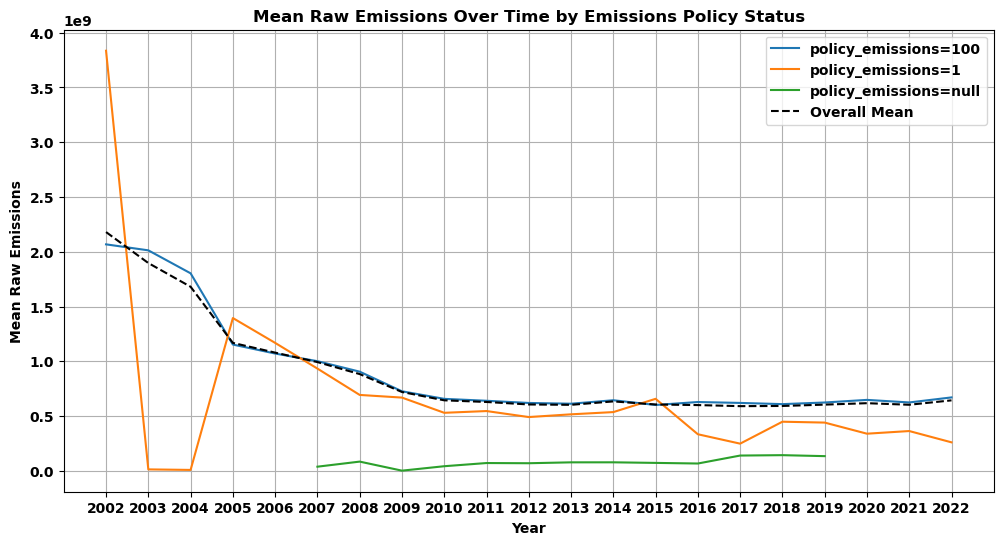

In [6]:
### Raw Emissions by Emissions Policy Status

# Filter to only necessary columns for plot
filtered_data = data[['metric_year', 'co2directscope1_raw', 'policy_emissions']]
filtered_data['policy_emissions'].fillna('null', inplace=True) # Convert null values to string 'null'

# Group by metric_year and verification status (1/100/null), then calculate the mean co2directscope1_intensity
grouped_data = filtered_data.groupby(['metric_year', 'policy_emissions'])['co2directscope1_raw'].mean().unstack()
overall_mean = filtered_data.groupby('metric_year')['co2directscope1_raw'].mean()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(grouped_data.index, grouped_data[100], label='policy_emissions=100')
plt.plot(grouped_data.index, grouped_data[1], label='policy_emissions=1')
plt.plot(grouped_data.index, grouped_data['null'], label='policy_emissions=null')
plt.plot(overall_mean.index, overall_mean, label='Overall Mean', linestyle='--', color='black')

plt.xlabel('Year')
plt.ylabel('Mean Raw Emissions')
plt.title('Mean Raw Emissions Over Time by Emissions Policy Status')
plt.xticks(grouped_data.index)
plt.legend()
plt.grid(True)
plt.show()


C:\Users\Marshall\AppData\Local\Temp\ipykernel_18360\3131766037.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filtered_data['policy_emissions'].fillna('null', inplace=True) # Convert null values to string 'null'
C:\Users\Marshall\AppData\Local\Temp\ipykernel_18360\3131766037.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'null' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  filtered_data['pol

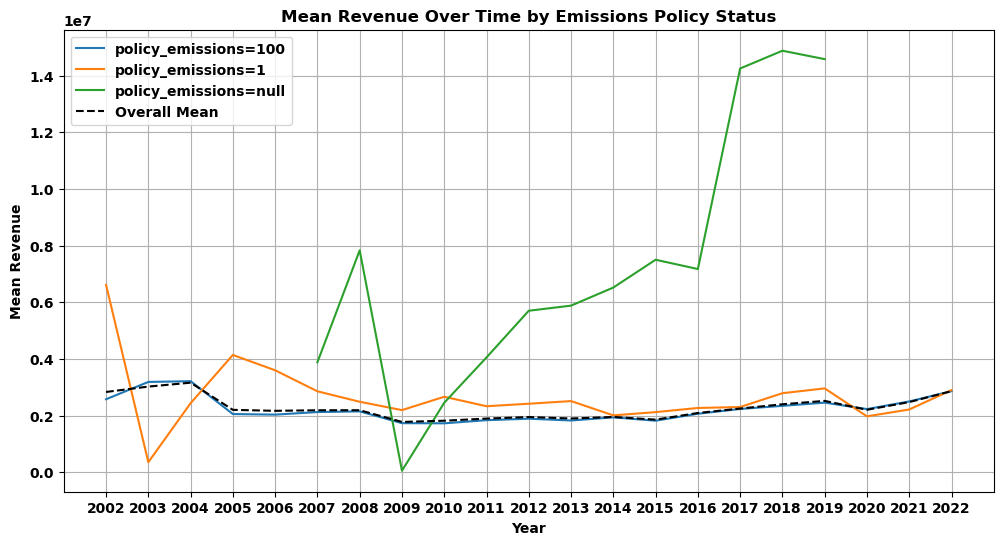

In [7]:
### Revenue by Emissions Policy Status

# Filter to only necessary columns for plot
filtered_data = data[['metric_year', 'revenue', 'policy_emissions']]
filtered_data['policy_emissions'].fillna('null', inplace=True) # Convert null values to string 'null'

# Group by metric_year and verification status (1/100/null), then calculate the mean co2directscope1_intensity
grouped_data = filtered_data.groupby(['metric_year', 'policy_emissions'])['revenue'].mean().unstack()
overall_mean = filtered_data.groupby('metric_year')['revenue'].mean()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(grouped_data.index, grouped_data[100], label='policy_emissions=100')
plt.plot(grouped_data.index, grouped_data[1], label='policy_emissions=1')
plt.plot(grouped_data.index, grouped_data['null'], label='policy_emissions=null')
plt.plot(overall_mean.index, overall_mean, label='Overall Mean', linestyle='--', color='black')

plt.xlabel('Year')
plt.ylabel('Mean Revenue')
plt.title('Mean Revenue Over Time by Emissions Policy Status')
plt.xticks(grouped_data.index)
plt.legend()
plt.grid(True)
plt.show()


C:\Users\Marshall\AppData\Local\Temp\ipykernel_18360\4024998075.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filtered_data['sbti_alignment'].fillna('null', inplace=True) # Convert null values to string 'null'
C:\Users\Marshall\AppData\Local\Temp\ipykernel_18360\4024998075.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'null' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  filtered_data['sbti_

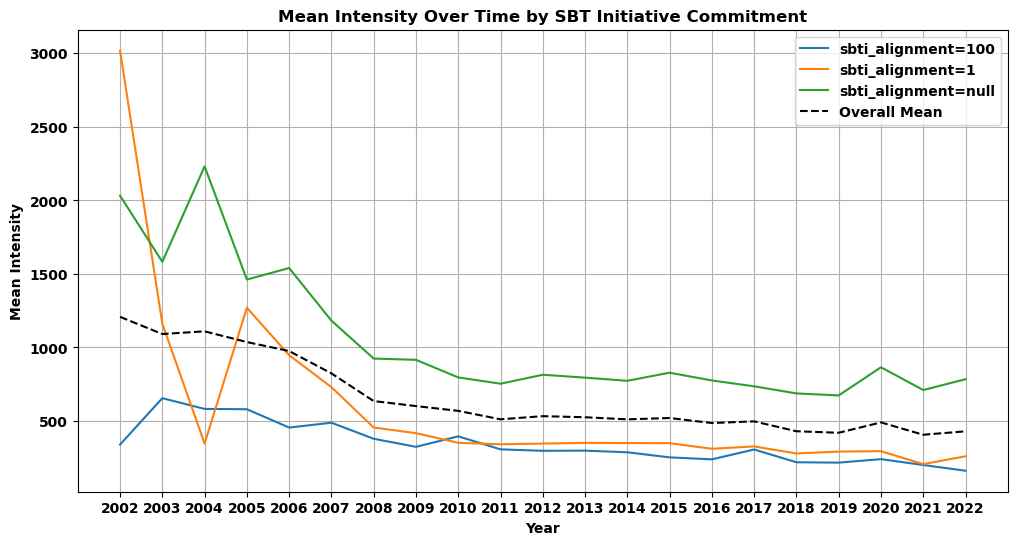

In [8]:
### Intensity by SBT Initiative Commitment

# Filter to only necessary columns for plot
filtered_data = data[['metric_year', 'co2directscope1_intensity', 'sbti_alignment']]
filtered_data['sbti_alignment'].fillna('null', inplace=True) # Convert null values to string 'null'

# Group by metric_year and verification status (1/100/null), then calculate the mean co2directscope1_intensity
grouped_data = filtered_data.groupby(['metric_year', 'sbti_alignment'])['co2directscope1_intensity'].mean().unstack()
overall_mean = filtered_data.groupby('metric_year')['co2directscope1_intensity'].mean()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(grouped_data.index, grouped_data[100], label='sbti_alignment=100')
plt.plot(grouped_data.index, grouped_data[1], label='sbti_alignment=1')
plt.plot(grouped_data.index, grouped_data['null'], label='sbti_alignment=null')
plt.plot(overall_mean.index, overall_mean, label='Overall Mean', linestyle='--', color='black')

plt.xlabel('Year')
plt.ylabel('Mean Intensity')
plt.title('Mean Intensity Over Time by SBT Initiative Commitment')
plt.xticks(grouped_data.index)
plt.legend()
plt.grid(True)
plt.show()


C:\Users\Marshall\AppData\Local\Temp\ipykernel_18360\1679381948.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filtered_data['sbti_alignment'].fillna('null', inplace=True) # Convert null values to string 'null'
C:\Users\Marshall\AppData\Local\Temp\ipykernel_18360\1679381948.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'null' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  filtered_data['sbti_

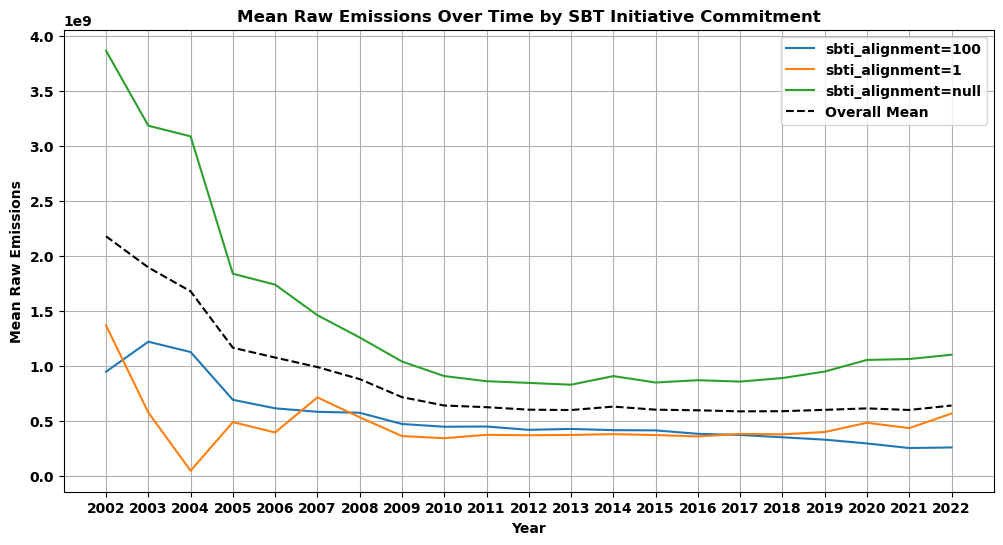

In [9]:
### Raw Emissions by SBT Initiative Commitment

# Filter to only necessary columns for plot
filtered_data = data[['metric_year', 'co2directscope1_raw', 'sbti_alignment']]
filtered_data['sbti_alignment'].fillna('null', inplace=True) # Convert null values to string 'null'

# Group by metric_year and verification status (1/100/null), then calculate the mean co2directscope1_intensity
grouped_data = filtered_data.groupby(['metric_year', 'sbti_alignment'])['co2directscope1_raw'].mean().unstack()
overall_mean = filtered_data.groupby('metric_year')['co2directscope1_raw'].mean()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(grouped_data.index, grouped_data[100], label='sbti_alignment=100')
plt.plot(grouped_data.index, grouped_data[1], label='sbti_alignment=1')
plt.plot(grouped_data.index, grouped_data['null'], label='sbti_alignment=null')
plt.plot(overall_mean.index, overall_mean, label='Overall Mean', linestyle='--', color='black')

plt.xlabel('Year')
plt.ylabel('Mean Raw Emissions')
plt.title('Mean Raw Emissions Over Time by SBT Initiative Commitment')
plt.xticks(grouped_data.index)
plt.legend()
plt.grid(True)
plt.show()


C:\Users\Marshall\AppData\Local\Temp\ipykernel_18360\2048099501.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filtered_data['sbti_alignment'].fillna('null', inplace=True) # Convert null values to string 'null'
C:\Users\Marshall\AppData\Local\Temp\ipykernel_18360\2048099501.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'null' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  filtered_data['sbti_

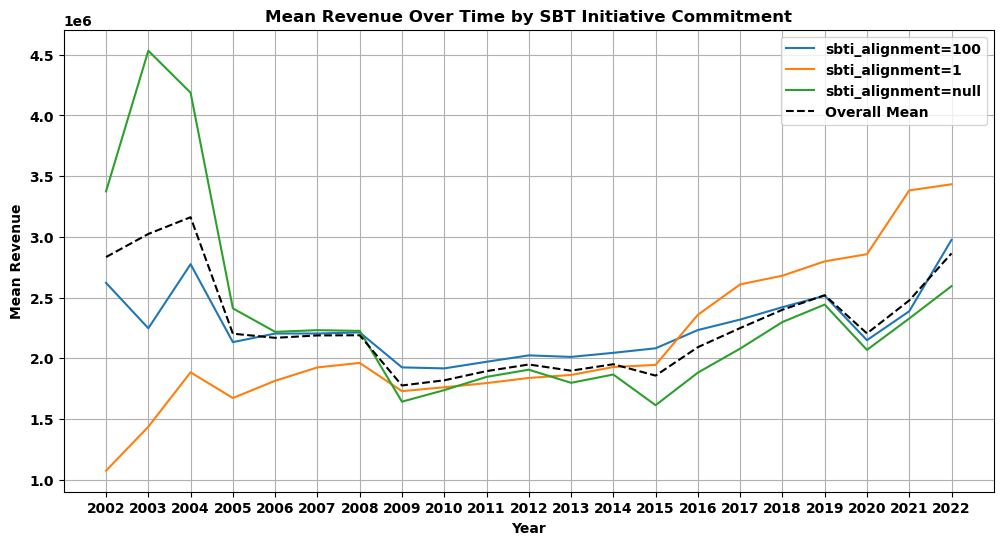

In [10]:
### Revenue by SBT Initiative Commitment

# Filter to only necessary columns for plot
filtered_data = data[['metric_year', 'revenue', 'sbti_alignment']]
filtered_data['sbti_alignment'].fillna('null', inplace=True) # Convert null values to string 'null'

# Group by metric_year and verification status (1/100/null), then calculate the mean co2directscope1_intensity
grouped_data = filtered_data.groupby(['metric_year', 'sbti_alignment'])['revenue'].mean().unstack()
overall_mean = filtered_data.groupby('metric_year')['revenue'].mean()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(grouped_data.index, grouped_data[100], label='sbti_alignment=100')
plt.plot(grouped_data.index, grouped_data[1], label='sbti_alignment=1')
plt.plot(grouped_data.index, grouped_data['null'], label='sbti_alignment=null')
plt.plot(overall_mean.index, overall_mean, label='Overall Mean', linestyle='--', color='black')

plt.xlabel('Year')
plt.ylabel('Mean Revenue')
plt.title('Mean Revenue Over Time by SBT Initiative Commitment')
plt.xticks(grouped_data.index)
plt.legend()
plt.grid(True)
plt.show()


C:\Users\Marshall\AppData\Local\Temp\ipykernel_18360\378476458.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filtered_data['nz_statement'].fillna('null', inplace=True) # Convert null values to string 'null'
C:\Users\Marshall\AppData\Local\Temp\ipykernel_18360\378476458.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'null' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  filtered_data['nz_statem

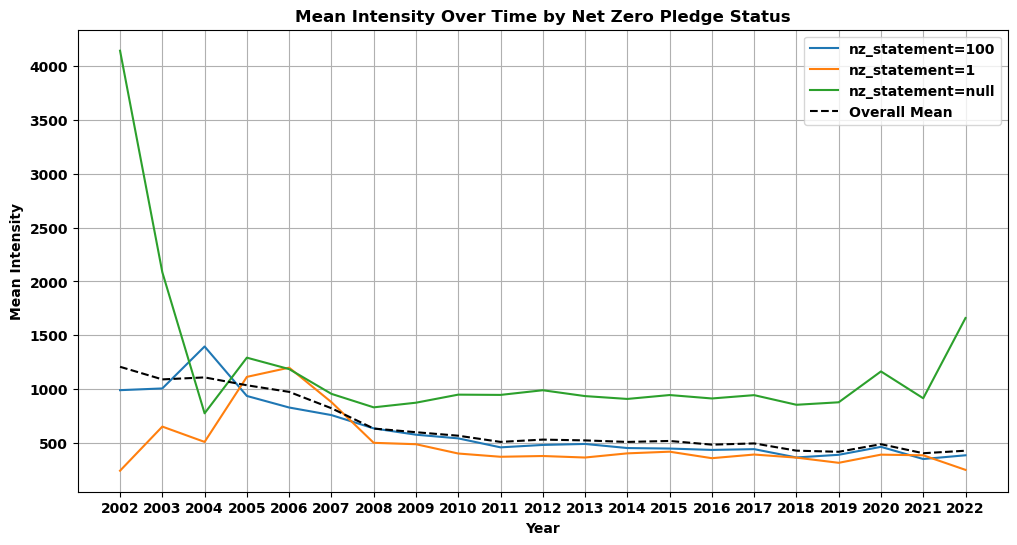

In [11]:
### Intensity by Net Zero Pledge Status

# Filter to only necessary columns for plot
filtered_data = data[['metric_year', 'co2directscope1_intensity', 'nz_statement']]
filtered_data['nz_statement'].fillna('null', inplace=True) # Convert null values to string 'null'

# Group by metric_year and verification status (1/100/null), then calculate the mean co2directscope1_intensity
grouped_data = filtered_data.groupby(['metric_year', 'nz_statement'])['co2directscope1_intensity'].mean().unstack()
overall_mean = filtered_data.groupby('metric_year')['co2directscope1_intensity'].mean()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(grouped_data.index, grouped_data[100], label='nz_statement=100')
plt.plot(grouped_data.index, grouped_data[1], label='nz_statement=1')
plt.plot(grouped_data.index, grouped_data['null'], label='nz_statement=null')
plt.plot(overall_mean.index, overall_mean, label='Overall Mean', linestyle='--', color='black')

plt.xlabel('Year')
plt.ylabel('Mean Intensity')
plt.title('Mean Intensity Over Time by Net Zero Pledge Status')
plt.xticks(grouped_data.index)
plt.legend()
plt.grid(True)
plt.show()


C:\Users\Marshall\AppData\Local\Temp\ipykernel_18360\2199259587.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filtered_data['nz_statement'].fillna('null', inplace=True) # Convert null values to string 'null'
C:\Users\Marshall\AppData\Local\Temp\ipykernel_18360\2199259587.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'null' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  filtered_data['nz_stat

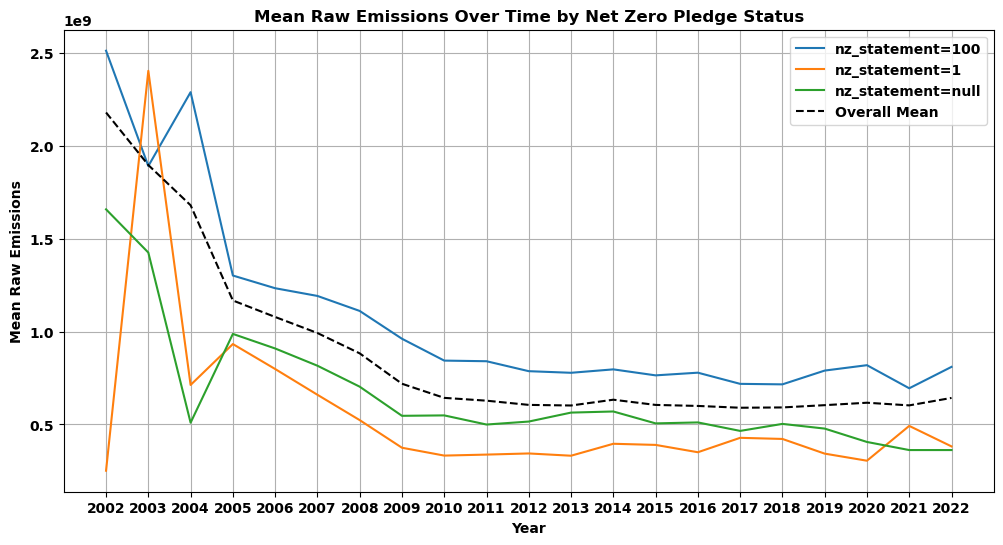

In [12]:
### Raw Emissions by Net Zero Pledge Status

# Filter to only necessary columns for plot
filtered_data = data[['metric_year', 'co2directscope1_raw', 'nz_statement']]
filtered_data['nz_statement'].fillna('null', inplace=True) # Convert null values to string 'null'

# Group by metric_year and verification status (1/100/null), then calculate the mean co2directscope1_intensity
grouped_data = filtered_data.groupby(['metric_year', 'nz_statement'])['co2directscope1_raw'].mean().unstack()
overall_mean = filtered_data.groupby('metric_year')['co2directscope1_raw'].mean()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(grouped_data.index, grouped_data[100], label='nz_statement=100')
plt.plot(grouped_data.index, grouped_data[1], label='nz_statement=1')
plt.plot(grouped_data.index, grouped_data['null'], label='nz_statement=null')
plt.plot(overall_mean.index, overall_mean, label='Overall Mean', linestyle='--', color='black')

plt.xlabel('Year')
plt.ylabel('Mean Raw Emissions')
plt.title('Mean Raw Emissions Over Time by Net Zero Pledge Status')
plt.xticks(grouped_data.index)
plt.legend()
plt.grid(True)
plt.show()


C:\Users\Marshall\AppData\Local\Temp\ipykernel_18360\3017365209.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filtered_data['nz_statement'].fillna('null', inplace=True) # Convert null values to string 'null'
C:\Users\Marshall\AppData\Local\Temp\ipykernel_18360\3017365209.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'null' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  filtered_data['nz_stat

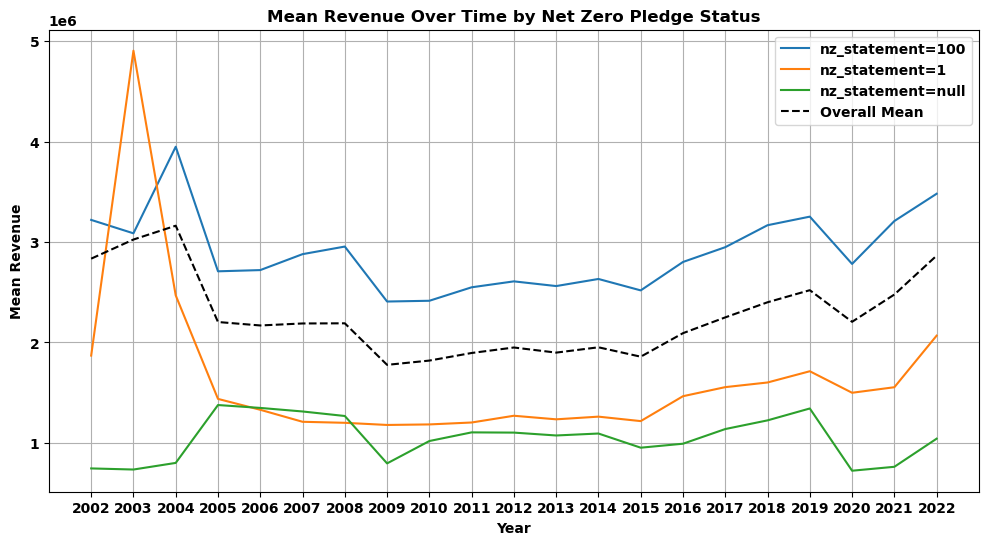

In [13]:
### Revenue by Net Zero Pledge Status

# Filter to only necessary columns for plot
filtered_data = data[['metric_year', 'revenue', 'nz_statement']]
filtered_data['nz_statement'].fillna('null', inplace=True) # Convert null values to string 'null'

# Group by metric_year and verification status (1/100/null), then calculate the mean co2directscope1_intensity
grouped_data = filtered_data.groupby(['metric_year', 'nz_statement'])['revenue'].mean().unstack()
overall_mean = filtered_data.groupby('metric_year')['revenue'].mean()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(grouped_data.index, grouped_data[100], label='nz_statement=100')
plt.plot(grouped_data.index, grouped_data[1], label='nz_statement=1')
plt.plot(grouped_data.index, grouped_data['null'], label='nz_statement=null')
plt.plot(overall_mean.index, overall_mean, label='Overall Mean', linestyle='--', color='black')

plt.xlabel('Year')
plt.ylabel('Mean Revenue')
plt.title('Mean Revenue Over Time by Net Zero Pledge Status')
plt.xticks(grouped_data.index)
plt.legend()
plt.grid(True)
plt.show()


C:\Users\Marshall\AppData\Local\Temp\ipykernel_18360\4223239087.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filtered_data['verification_co2directscope1'].fillna('null', inplace=True) # Convert null values to string 'null'
C:\Users\Marshall\AppData\Local\Temp\ipykernel_18360\4223239087.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'null' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  filter

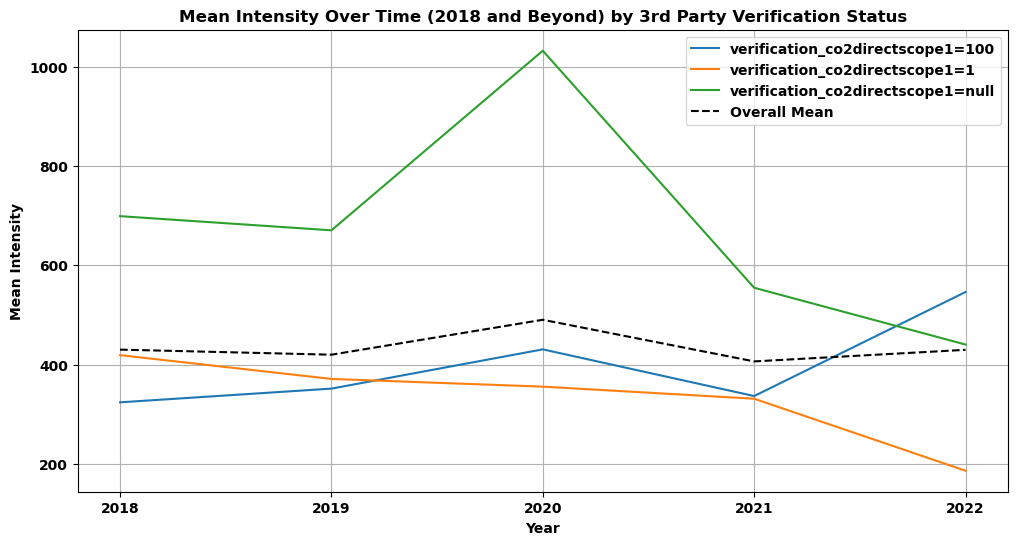

In [14]:
### Intensity by 3rd Party Verification Status

# Filter to only necessary columns for plot
filtered_data = data[['metric_year', 'co2directscope1_intensity', 'verification_co2directscope1']]
filtered_data['verification_co2directscope1'].fillna('null', inplace=True) # Convert null values to string 'null'

# Filter for metric_year >= 2018 due to availablity of verified data
filtered_data = filtered_data[filtered_data['metric_year'] >= 2018]

# Group by metric_year and verification status (1/100/null), then calculate the mean co2directscope1_intensity
grouped_data = filtered_data.groupby(['metric_year', 'verification_co2directscope1'])['co2directscope1_intensity'].mean().unstack()
overall_mean = filtered_data.groupby('metric_year')['co2directscope1_intensity'].mean()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(grouped_data.index, grouped_data[100], label='verification_co2directscope1=100')
plt.plot(grouped_data.index, grouped_data[1], label='verification_co2directscope1=1')
plt.plot(grouped_data.index, grouped_data['null'], label='verification_co2directscope1=null')
plt.plot(overall_mean.index, overall_mean, label='Overall Mean', linestyle='--', color='black')

plt.xlabel('Year')
plt.ylabel('Mean Intensity')
plt.title('Mean Intensity Over Time (2018 and Beyond) by 3rd Party Verification Status')
plt.xticks(grouped_data.index)
plt.legend()
plt.grid(True)
plt.show()


C:\Users\Marshall\AppData\Local\Temp\ipykernel_18360\1447359558.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filtered_data['verification_co2directscope1'].fillna('null', inplace=True) # Convert null values to string 'null'
C:\Users\Marshall\AppData\Local\Temp\ipykernel_18360\1447359558.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'null' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  filter

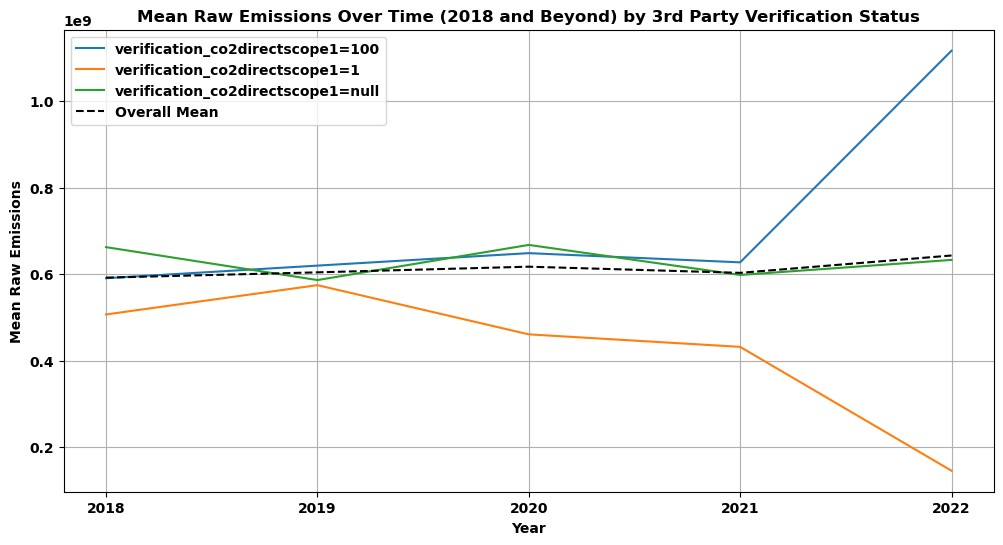

In [15]:
### Raw Emissions by 3rd Party Verification Status

# Filter to only necessary columns for plot
filtered_data = data[['metric_year', 'co2directscope1_raw', 'verification_co2directscope1']]
filtered_data['verification_co2directscope1'].fillna('null', inplace=True) # Convert null values to string 'null'

# Filter for metric_year >= 2018 due to availablity of verified data
filtered_data = filtered_data[filtered_data['metric_year'] >= 2018]

# Group by metric_year and verification status (1/100/null), then calculate the mean co2directscope1_intensity
grouped_data = filtered_data.groupby(['metric_year', 'verification_co2directscope1'])['co2directscope1_raw'].mean().unstack()
overall_mean = filtered_data.groupby('metric_year')['co2directscope1_raw'].mean()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(grouped_data.index, grouped_data[100], label='verification_co2directscope1=100')
plt.plot(grouped_data.index, grouped_data[1], label='verification_co2directscope1=1')
plt.plot(grouped_data.index, grouped_data['null'], label='verification_co2directscope1=null')
plt.plot(overall_mean.index, overall_mean, label='Overall Mean', linestyle='--', color='black')

plt.xlabel('Year')
plt.ylabel('Mean Raw Emissions')
plt.title('Mean Raw Emissions Over Time (2018 and Beyond) by 3rd Party Verification Status')
plt.xticks(grouped_data.index)
plt.legend()
plt.grid(True)
plt.show()


C:\Users\Marshall\AppData\Local\Temp\ipykernel_18360\2033495063.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filtered_data['verification_co2directscope1'].fillna('null', inplace=True) # Convert null values to string 'null'
C:\Users\Marshall\AppData\Local\Temp\ipykernel_18360\2033495063.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'null' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  filter

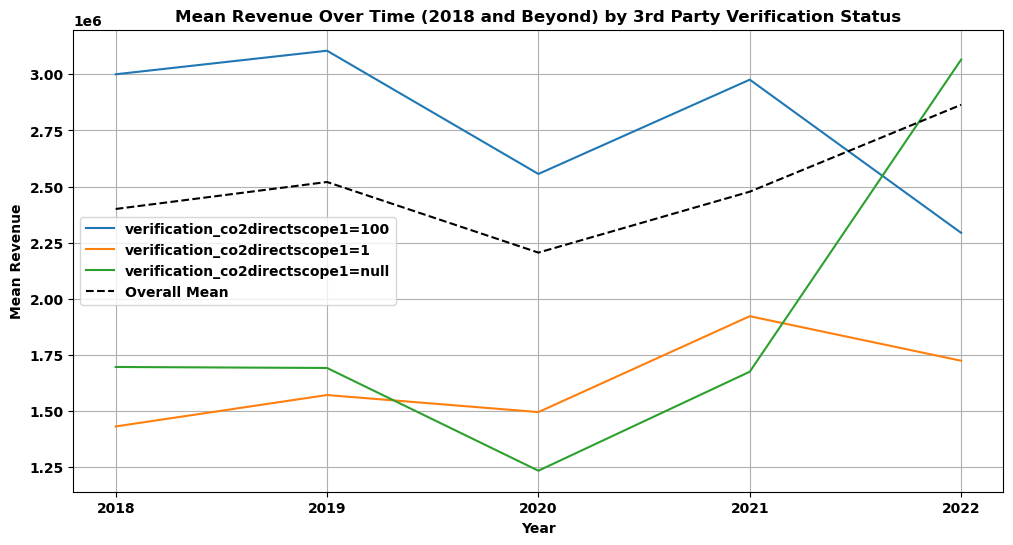

In [16]:
### Revenue by 3rd Party Verification Status

# Filter to only necessary columns for plot
filtered_data = data[['metric_year', 'revenue', 'verification_co2directscope1']]
filtered_data['verification_co2directscope1'].fillna('null', inplace=True) # Convert null values to string 'null'

# Filter for metric_year >= 2018 due to availablity of verified data
filtered_data = filtered_data[filtered_data['metric_year'] >= 2018]

# Group by metric_year and verification status (1/100/null), then calculate the mean co2directscope1_intensity
grouped_data = filtered_data.groupby(['metric_year', 'verification_co2directscope1'])['revenue'].mean().unstack()
overall_mean = filtered_data.groupby('metric_year')['revenue'].mean()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(grouped_data.index, grouped_data[100], label='verification_co2directscope1=100')
plt.plot(grouped_data.index, grouped_data[1], label='verification_co2directscope1=1')
plt.plot(grouped_data.index, grouped_data['null'], label='verification_co2directscope1=null')
plt.plot(overall_mean.index, overall_mean, label='Overall Mean', linestyle='--', color='black')

plt.xlabel('Year')
plt.ylabel('Mean Revenue')
plt.title('Mean Revenue Over Time (2018 and Beyond) by 3rd Party Verification Status')
plt.xticks(grouped_data.index)
plt.legend()
plt.grid(True)
plt.show()
